In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
#df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [24]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.fillna(0, inplace=True)
df.drop(df.select_dtypes(['object']).columns,  axis=1, inplace=True)
print(df)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          0.0       0.0           44.0   
1           7.4     25.1       0.0          0.0       0.0           44.0   
2          12.9     25.7       0.0          0.0       0.0           46.0   
3           9.2     28.0       0.0          0.0       0.0           24.0   
4          17.5     32.3       1.0          0.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          0.0       0.0           31.0   
145456      3.6     25.3       0.0          0.0       0.0           22.0   
145457      5.4     26.9       0.0          0.0       0.0           37.0   
145458      7.8     27.0       0.0          0.0       0.0           28.0   
145459     14.9      0.0       0.0          0.0       0.0            0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  float64
 17  RainTomorrow   145460 non-nul

In [26]:
scaler = StandardScaler()
data= scaler.fit_transform(df)
print (pd.DataFrame(data))

              0         1         2         3         4         5         6   \
0       0.205232 -0.016205 -0.203581 -0.746516 -0.845389  0.407796  0.681283   
1      -0.720312  0.280780 -0.275097 -0.746516 -0.845389  0.407796 -1.097764   
2       0.128104  0.361776 -0.275097 -0.746516 -0.845389  0.527921  0.570092   
3      -0.442649  0.672260 -0.275097 -0.746516 -0.845389 -0.793463 -0.319431   
4       0.837688  1.252731 -0.155903 -0.746516 -0.845389  0.227607 -0.764193   
...          ...       ...       ...       ...       ...       ...       ...   
145455 -1.429896  0.051292 -0.275097 -0.746516 -0.845389 -0.373022 -0.097050   
145456 -1.306490  0.307779 -0.275097 -0.746516 -0.845389 -0.913589 -0.097050   
145457 -1.028827  0.523768 -0.275097 -0.746516 -0.845389 -0.012645 -0.541812   
145458 -0.658609  0.537267 -0.275097 -0.746516 -0.845389 -0.553211 -0.097050   
145459  0.436619 -3.107548 -0.275097 -0.746516 -0.845389 -2.234973  0.347711   

              7         8         9    

In [4]:
def kmeans(X, k, max_iters=50):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    return centroids, labels

In [5]:
def calculate_ssd(X, centroids, labels):
    ssd = 0
    for i in range(len(centroids)):
        ssd += np.sum((X[labels == i] - centroids[i])**2)
    return ssd

In [6]:
def find_optimal_k(X, max_k=10):
    ssd_values = []
    for k in range(1, max_k + 1):
        centroids, labels = kmeans(X, k)
        ssd = calculate_ssd(X, centroids, labels)
        ssd_values.append(ssd)
    
    return ssd_values

In [7]:
def plot_elbow(ssd_values):
    plt.plot(range(1, len(ssd_values) + 1), ssd_values, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.show()

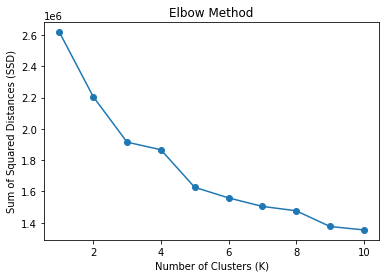

In [8]:
max_clusters = 10
ssd_values = find_optimal_k(data, max_k=max_clusters)
plot_elbow(ssd_values)
optimal_k = 4

In [9]:
centroids, labels = kmeans(data, optimal_k)

In [10]:
def plot_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='turbo')
    plt.title('K-means Clustering (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

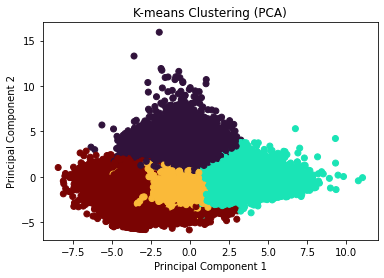

In [28]:
plot_clusters(data, labels)